# Original script to make the irc approved plot
Most of this script is testing different methods
1. Load in dat files or fits files from SNANA
2. sort to get mag and color
3. make contours

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import math
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from scipy.stats import gaussian_kde
from scipy.stats import kde
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
%matplotlib inline

Load in real canididates (made by hand)

In [2]:
gcnName, snid, RA, DEC, MAG, MAGERR, BAND, MJD, HOST_Z, flux, fluxerr = np.genfromtxt('des_190510mags1.txt', unpack=True, dtype='str')
name, real_color, real_apparent_mag = np.genfromtxt('color_g-r_mag.txt', dtype='str', unpack=True) #file from google sheet "des vs caltech 190510", sheet 2

In [3]:
print name

['desgw-190510a' 'desgw-190510b' 'desgw-190510c' 'desgw-190510d'
 'desgw-190510e' 'desgw-190510f' 'desgw-190510g' 'desgw-190510h'
 'desgw-190510h' 'desgw-190510j']


In [4]:
name = np.delete(name, 8)
print name
real_color = np.delete(real_color, 8)
real_apparent_mag = np.delete(real_apparent_mag, 8)
print len(real_color), len(real_apparent_mag)

['desgw-190510a' 'desgw-190510b' 'desgw-190510c' 'desgw-190510d'
 'desgw-190510e' 'desgw-190510f' 'desgw-190510g' 'desgw-190510h'
 'desgw-190510j']
9 9


## SN SIMS USED IN PAPER VERSION 12/17/19
These are pre-sorted txt files

In [2]:
CC_mag_r_rz = np.loadtxt("CC_mag_r_rzphot_v3.txt", unpack=True)
CC_mag_g_gz = np.loadtxt("CC_mag_r_gzphot_v3.txt", unpack=True)
CC_mag_g_gr = np.loadtxt("CC_mag_r_grphot_v3.txt", unpack=True)
CC_rzcolor = np.loadtxt("CC_rzcolorphot_v3.txt", unpack=True)
CC_gzcolor = np.loadtxt("CC_gzcolorphot_v3.txt", unpack=True)
CC_grcolor = np.loadtxt("CC_grcolorphot_v3.txt", unpack=True)

print len(CC_mag_r_rz)
print len(CC_mag_g_gz)
print len(CC_mag_g_gr)
print len(CC_rzcolor)
print len(CC_gzcolor)
print len(CC_grcolor)

1039
538
541
1039
538
541


In [3]:
Ia_mag_r_rz = np.loadtxt("Ia_mag_r_rzphot_v3.txt", unpack=True)
Ia_mag_g_gz = np.loadtxt("Ia_mag_r_gzphot_v3.txt", unpack=True)
Ia_mag_g_gr = np.loadtxt("Ia_mag_r_grphot_v3.txt", unpack=True)
Ia_rzcolor = np.loadtxt("Ia_rzcolorphot_v3.txt", unpack=True)
Ia_gzcolor = np.loadtxt("Ia_gzcolorphot_v3.txt", unpack=True)
Ia_grcolor = np.loadtxt("Ia_grcolorphot_v3.txt", unpack=True)

print len(Ia_mag_r_rz)
print len(Ia_mag_g_gz)
print len(Ia_mag_g_gr)
print len(Ia_rzcolor)
print len(Ia_gzcolor)
print len(Ia_grcolor)

1696
1079
1057
1696
1079
1057


### load new cc and Ia sims using snr > 5 cut

In [4]:
CC_mag_r_rz = np.loadtxt("CC_mag_r_rzphot_1-14-20.txt", unpack=True)
CC_mag_g_gz = np.loadtxt("CC_mag_r_gzphot_1-14-20.txt", unpack=True)
CC_mag_g_gr = np.loadtxt("CC_mag_r_grphot_1-14-20.txt", unpack=True)
CC_rzcolor = np.loadtxt("CC_rzcolorphot_1-14-20.txt", unpack=True)
CC_gzcolor = np.loadtxt("CC_gzcolorphot_1-14-20.txt", unpack=True)
CC_grcolor = np.loadtxt("CC_grcolorphot_1-14-20.txt", unpack=True)

print len(CC_mag_r_rz)
print len(CC_mag_g_gz)
print len(CC_mag_g_gr)
print len(CC_rzcolor)
print len(CC_gzcolor)
print len(CC_grcolor)

1956
1409
1473
1956
1409
1473


In [5]:
Ia_mag_r_rz = np.loadtxt("Ia_mag_r_rzphot_1-14-20.txt", unpack=True)
Ia_mag_g_gz = np.loadtxt("Ia_mag_r_gzphot_1-14-20.txt", unpack=True)
Ia_mag_g_gr = np.loadtxt("Ia_mag_r_grphot_1-14-20.txt", unpack=True)
Ia_rzcolor = np.loadtxt("Ia_rzcolorphot_1-14-20.txt", unpack=True)
Ia_gzcolor = np.loadtxt("Ia_gzcolorphot_1-14-20.txt", unpack=True)
Ia_grcolor = np.loadtxt("Ia_grcolorphot_1-14-20.txt", unpack=True)

print len(Ia_mag_r_rz)
print len(Ia_mag_g_gz)
print len(Ia_mag_g_gr)
print len(Ia_rzcolor)
print len(Ia_gzcolor)
print len(Ia_grcolor)

4043
3260
3402
4043
3260
3402


In [9]:
print len(Ia_mag_g_gr), len(CC_mag_g_gr)
print len(Ia_grcolor), len(CC_grcolor)
print type(Ia_grcolor)

goodmagia = []
goodcolia = []
for mag, color in zip(Ia_mag_g_gr, Ia_grcolor):
    if mag < 27:
        goodmagia.append(mag)
        goodcolia.append(color)
goodmagcc = []
goodcolcc = []
for mag, color in zip(CC_mag_g_gr, CC_grcolor):
    if mag < 27:
        goodmagcc.append(mag)
        goodcolcc.append(color)

allSN_color = np.append(goodcolia,goodcolcc)
allSN_mag_g_gr = np.append(goodmagia, goodmagcc)

print len(allSN_mag_g_gr)
print len(allSN_color)

3402 1473
3402 1473
<type 'numpy.ndarray'>
4854
4854


### Test contour

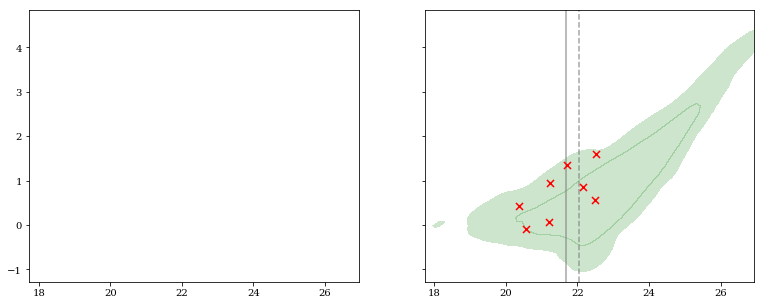

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))

allSNgr_2darray = np.asarray([allSN_mag_g_gr, allSN_color])
allSNx, allSNy = allSNgr_2darray

allSNk = gaussian_kde(allSNgr_2darray)
allSNxi, allSNyi = np.mgrid[allSNx.min():allSNx.max():allSNx.size**0.5*1j,allSNy.min():allSNy.max():allSNy.size**0.5*1j]
allSNzi = allSNk(np.vstack([allSNxi.flatten(), allSNyi.flatten()]))

allSNzi = 1 - (allSNzi-allSNzi.min())/(allSNzi.max() - allSNzi.min())
allSNzi =allSNzi.reshape(allSNxi.shape)

origin = 'lower'
levels = [0., 0.90, 0.99]

SNCS = ax[1].contourf(allSNxi, allSNyi, allSNzi,levels = levels,
              colors=['g'],
              linewidths=(1,),
              origin=origin, alpha=0.2)

for k in range(len(real_color)):
    ax[1].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])

ax[1].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[1].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

#plt.xlim(19.5,23.1)
#plt.ylim(-2,3)

## test new csv (cc)

In [6]:
cols = ['snid', 'g_mag','r_mag','z_mag', 'redshift', 'color']
cc_df = pd.read_csv("full_CC_snr5cut.csv", names=cols, header=None)

In [55]:
#cc_df
data_dict = np.load('190510_ag_CCdata.npy').item()

In [56]:
for snid, info in data_dict.iteritems():
    if snid=="2461":
        lc = info['lightcurve']
        md = info['metadata']
print lc
print 
print md
## check if we have phase information

         MJD FLT FIELD PHOTFLAG    PHOTPROB    FLUXCAL FLUXCALERR   PSF_SIG1  \
0  58613.953   z     1        0  0.21507715  210.56609  108.82649  2.5322587   
1  58613.977   r     1        0   0.5975446   70.07758  13.458488  2.2176924   
2  58614.002   g     1        0  0.23880722  46.439945  17.560608   2.941195   

  PSF_SIG2 PSF_RATIO SKY_SIG  SKY_SIG_T RDNOISE ZEROPT ZEROPT_ERR  GAIN  \
0      0.0       0.0  189.63      15.34     0.0  30.49      0.008  0.97   
1      0.0       0.0   35.98  5.6154947     0.0  30.83      0.003  0.95   
2      0.0       0.0   29.75  3.4305081     0.0  30.63      0.003   0.9   

  SIM_MAGOBS SIM_FLUXCAL_HOSTERR  
0  23.283335                 0.0  
1   23.22561                 0.0  
2  23.964863                 0.0  

SUBSURVEY                                                      
SNID                                           2461            
IAUC                                           NULL            
FAKE                                         

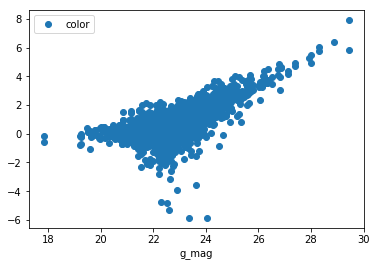

In [8]:
df = cc_df[cc_df.g_mag != -999]
df.plot(x='g_mag', y='color', style='o')
#df.plot(x='g_mag', y='color', kind='density')

In [9]:
import matplotlib.cm as cm

In [10]:
x = df['g_mag'].values
y = df['color'].values
z = df['redshift'].values

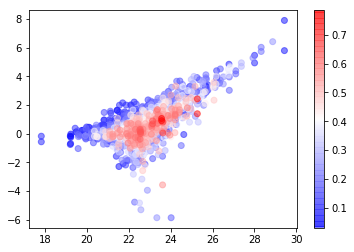

In [11]:
# plt.hist2d(x, y, bins=30, weights=z, cmap='Blues')
# cb = plt.colorbar()
# cb.set_label('counts in bin')

idx = np.argsort(z)
plt.scatter(x[idx],y[idx],c=z[idx], cmap='bwr', alpha=0.5)
plt.colorbar()

In [28]:
cols = ['snid', 'g_mag','r_mag','z_mag', 'redshift', 'color']
Ia_df = pd.read_csv("full_CC_snr5cut.csv", names=cols, header=None)
iadf = Ia_df[Ia_df.g_mag != -999]

In [30]:
fullsndf = iadf.append(df)

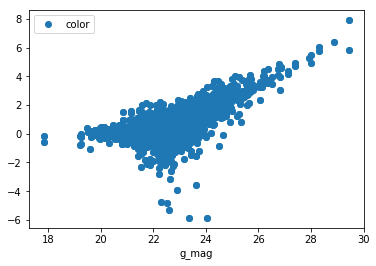

In [31]:
fullsndf.plot(x='g_mag', y='color', style='o')

In [32]:
fullx = fullsndf['g_mag'].values
fully = fullsndf['color'].values
fullz = fullsndf['redshift'].values

Text(0,0.5,'color')

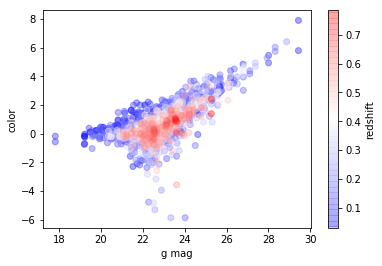

In [52]:
idx = np.argsort(fullz)
plt.scatter(fullx[idx],fully[idx],c=fullz[idx], cmap='bwr', alpha=0.2)
cbar = plt.colorbar()
cbar.ax.set_ylabel('redshift')
plt.xlabel('g mag')
plt.ylabel('color')


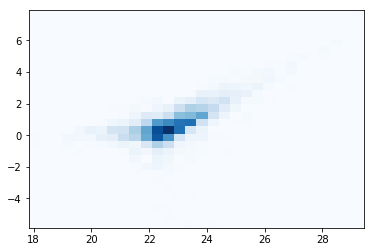

In [44]:
plt.hist2d(fullx, fully,  bins=30, cmap='Blues');

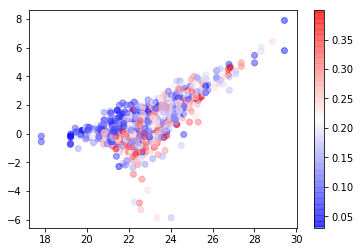

In [53]:
#fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))
xlow, xhigh, ylow, yhigh, zlow, zhigh = [],[],[],[], [], []
for i in range(len(z)):
    if z[i] > 0.4:
        #ax[0].scatter(x,y,c=z, cmap='bwr', alpha=0.5)
        xhigh.append(x[i])
        yhigh.append(y[i])
        zhigh.append(z[i])
    else:
        xlow.append(x[i])
        ylow.append(y[i])
        zlow.append(z[i])
        
plt.scatter(xlow,ylow,c=zlow, cmap='bwr', alpha=0.5)
plt.colorbar()
        

<function matplotlib.pyplot.colorbar>

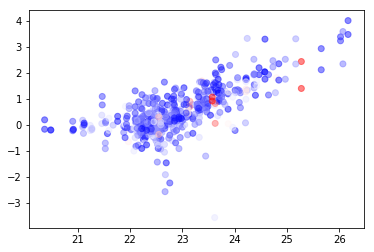

In [54]:
plt.scatter(xhigh,yhigh,c=zhigh, cmap='bwr', alpha=0.5)
plt.colorbar


## CHECK IF DATS3.TXT IS WHAT IS USED IN PAPER

In [2]:
KN_appmag_r_rz = np.loadtxt("KN_appmag_r_rzdats3.txt", unpack=True)
KN_appmag_g_gz = np.loadtxt("KN_appmag_r_gzdats3.txt", unpack=True)
KN_appmag_g_gr = np.loadtxt("KN_appmag_r_grdats3.txt", unpack=True)
KN_rzcolor = np.loadtxt("KN_rzcolordats3.txt", unpack=True)
KN_gzcolor = np.loadtxt("KN_gzcolordats3.txt", unpack=True)
KN_grcolor = np.loadtxt("KN_grcolordats3.txt", unpack=True)

print len(KN_appmag_r_rz)
print len(KN_appmag_g_gz)
print len(KN_appmag_g_gr)
print len(KN_rzcolor)
print len(KN_gzcolor)
print len(KN_grcolor)
#print len(vels_gr)

5165
4107
4163
5165
4107
4163


In [3]:
def open_dat(dat_file):
    infile = open(dat_file, 'r')
    lines = infile.readlines()
    infile.close()
    return lines

def get_lc_output(lines):

    columns = [y for y in [x.split(' ') for x in lines if x[0:8] == 'VARLIST:'][0] if y != ''][1:]
    data = [[y for y in x.split(' ') if y != ''][1:-1] for x in lines if x[0:4] == 'OBS:']
    df = pd.DataFrame(data=data, columns=columns)

    for col in columns:
        if col != 'FLT' and col != 'FIELD':
            df[col] = pd.to_numeric(df[col])

    return df

def get_meta_data(lines):

    snid = [y for y in [x for x in lines if x[0:5] == 'SNID:'][0].split(' ') if y != ''][1][0:]
    ra = float([y for y in [x for x in lines if x[0:3] == 'RA:'][0].split(' ') if y != ''][1])
    dec = float([y for y in [x for x in lines if x[0:3] == 'DEC'][0].split(' ') if y != ''][1])
    hostz = float([y for y in [x for x in lines if x[0:14] == 'REDSHIFT_FINAL'][0].split(' ') if y != ''][1])

    return {'SNID': snid, 'RA': ra, 'DEC': dec, 'HOSTZ': hostz}

def get_KN_data(lines):

    vel = float([y for y in [x for x in lines if x[0:16] == 'SIMSED_param(VK)'][0].split(' ') if y != ''][1])
    logXlan = float([y for y in [x for x in lines if x[0:21] == 'SIMSED_param(LOGXLAN)'][0].split(' ') if y != ''][1])
    logMass = float([y for y in [x for x in lines if x[0:21] == 'SIMSED_param(LOGMASS)'][0].split(' ') if y != ''][1])

    return {'VEL': vel, 'LOGXLAN': logXlan, 'LOGMASS': logMass}

def compute_mag_from_flux(fluxcal):
    mag = 27.5 - 2.5*math.log10(fluxcal)
    return mag

def absmag(mag, dist):
    M = mag - 5*math.log10(dist/10)
    return M

def calc_color_from_flux(gflux, rflux):
    try:
        g_mag = compute_mag_from_flux(gflux)
        r_mag = compute_mag_from_flux(rflux)
        color = g_mag - r_mag
        return color
    except:
        print "mag calc failed, check flux", gflux, rflux
    

def compute_skymag_from_skysig(skysig):
    skymag = 27.5 - 2.5*math.log10(skysig)
    return skymag

def convert_apmag_to_abmag(mag, d):
    #d must be in parsecs
    #mag must be greater than zero
    M = mag - 5 * np.log10(d / 10)
    return -1.0 * M

def convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3):
    #also works on arrays of z values
    cosmo = FlatLambdaCDM(H0=H0 * u.km / u.s / u.Mpc, Tcmb0=Tcmb0 * u.K, Om0=Om0)
    luminosity_distance = cosmo.luminosity_distance(z)
    #returns distance in parsecs
    return luminosity_distance.value * 10 ** 6


In [4]:
#KN_path = '/data/des41.b/data/SNDATA_ROOT/SIM/agarcia_DESGW_GW190510_KN/'
KN_path = '/home/s1/alyssag/alyssag/SNANA/RMsims/kn_sims_1-13-20_withphot_190510distdistribution/'
KN_dat_files = glob.glob(KN_path + '/*.DAT')

### original method for sorting snana dat files -- takes ~1hr to finish

In [ ]:
vels_gr = []
Xlans_gr =[]
masses_gr = []

vels_gz = []
Xlans_gz =[]
masses_gz = []

vels_rz = []
Xlans_rz =[]
masses_rz = []

maxsimobs = []
colorrz = []
colorgr = []
colorgz = []
m_r_rz = []
m_g_gr = []
m_g_gz = []
simg_gz = []
simg = []
simr = []

KN_appmag_r_rz = open("KN_appmag_r_rz_1-13-20.txt", 'w')
KN_appmag_g_gz = open("KN_appmag_r_gz_1-13-20.txt", 'w')
KN_appmag_g_gr = open("KN_appmag_r_gr_1-13-20.txt", 'w')
KN_rzcolor = open("KN_rzcolor_1-13-20.txt", 'w')
KN_gzcolor = open("KN_gzcolor_1-13-20.txt", 'w')
KN_grcolor = open("KN_grcolor_1-13-20.txt", 'w')

kn_vel_gr = open("kn_vel_gr1-13-20.txt", 'w')
kn_vel_gz = open("kn_vel_gz1-13-20.txt", 'w')
kn_vel_rz = open("kn_vel_rz1-13-20.txt", 'w')

kn_xlan_gr = open("kn_xlan_gr1-13-20.txt", 'w')
kn_xlan_gz = open("kn_xlan_gz1-13-20.txt", 'w')
kn_xlan_rz = open("kn_xlan_rz1-13-20.txt", 'w')

kn_mass_gr = open("kn_mass_gr1-13-20.txt", 'w')
kn_mass_gz = open("kn_mass_gz1-13-20.txt", 'w')
kn_mass_rz = open("kn_mass_rz1-13-20.txt", 'w')

for dat_file in KN_dat_files:
    try:
        lines = open_dat(dat_file)
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
    
#    photflags = np.array(lc['PHOTFLAG'].values, dtype=int)
#    photprobs = np.array(lc['PHOTPROB'].values, dtype=float)

#    cond = np.where(photprobs >= 0.7)[0] #return indicies of values that pass condition
#    test = list(cond)
#    goodlc = lc.loc[test, :] #keep only those
    
    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    
#    phoprob = [prob for flt, prob in zip(lc['FLT'].values, lc['PHOTPROB'].values) if flt == 'g' or flt == 'r']    

    if max(snr) > 5:
    #if min(phoprob) > 0.7:
        maxsimobs.append(max(lc['SIM_MAGOBS\n'].values))

        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]
        if dupes.empty: 
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups

        #there is a bug, drop repeated date
        else: 
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups
            
            for key, values in gb.iteritems():
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)
            
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups
        
        if not final_list.empty:
            for key, val in gb.iteritems():
                #print "key, val", key, val
                filters = final_list.ix[val]['FLT'].values #list of bands for each night
                if len(filters) >= 2: #need r and g bands 
                    fluxes = final_list.ix[val]['FLUXCAL'].values #fluxes for each band
                    simmagobs = final_list.ix[val]['SIM_MAGOBS\n'].values 
                    #print filters, fluxes, simmagobs
                    rflux = []
                    gflux = []
                    zflux = [] 
                    simmagr = []
                    simmagg = []
                    simmagz = []
                    for flt, flux, mag in zip(filters, fluxes, simmagobs):    
                        if flt == 'r':
                            #print fluxes[n], flt
                            rflux.append(flux)
                            simmagr.append(mag)
                        elif flt == 'g':
                            #print fluxes[n], flt
                            gflux.append(flux)
                            simmagg.append(mag)
                        elif flt == 'z':
                            zflux.append(flux)
                            simmagz.append(mag)
                            
                    # g-r color and gmag
                    for i,j,g in zip(gflux, rflux, simmagg):
                        if i > 0 and j > 0:
                            #print lc
                            #print i,j
                            color = calc_color_from_flux(i, j)
                            colorgr.append(color)
                            KN_grcolor.write("%s\n" % color)
                            
                            m = compute_mag_from_flux(i)
                            #if m > 30:
                            #    print lc
                            m_g_gr.append(m)
                            simg.append(g)
                            KN_appmag_g_gr.write("%s\n" % m)
                            
                            vels_gr.append(knmd["VEL"])
                            Xlans_gr.append(knmd["LOGXLAN"])
                            masses_gr.append(knmd["LOGMASS"])
                            kn_vel_gr.write("%s\n" % knmd['VEL'])
                            kn_xlan_gr.write("%s\n" % knmd['LOGXLAN'])
                            kn_mass_gr.write("%s\n" % knmd['LOGMASS'])
                    
                    # g-z color and gmag
                    for i,j,g in zip(gflux, zflux, simmagg):
                        if i > 0 and j > 0:
                            color = calc_color_from_flux(i, j)
                            colorgz.append(color)
                            KN_gzcolor.write("%s\n" % color)
                            
                            m = compute_mag_from_flux(i)
                            m_g_gz.append(m)
                            simg_gz.append(g)
                            KN_appmag_g_gz.write("%s\n" % m)
                            
                            vels_gz.append(knmd["VEL"])
                            Xlans_gz.append(knmd["LOGXLAN"])
                            masses_gz.append(knmd["LOGMASS"])
                            kn_vel_gz.write("%s\n" % knmd['VEL'])
                            kn_xlan_gz.write("%s\n" % knmd['LOGXLAN'])
                            kn_mass_gz.write("%s\n" % knmd['LOGMASS'])
                    
                    # r-z color and rmag
                    for i,j,r in zip(rflux, zflux, simmagr):
                        if i > 0 and j > 0:
                            color = calc_color_from_flux(i, j)
                            colorrz.append(color)
                            KN_rzcolor.write("%s\n" % color)
                            
                            m = compute_mag_from_flux(i)
                            m_r_rz.append(m)
                            simr.append(r)
                            KN_appmag_r_rz.write("%s\n" % m)
                            
                            vels_rz.append(knmd["VEL"])
                            Xlans_rz.append(knmd["LOGXLAN"])
                            masses_rz.append(knmd["LOGMASS"])
                            kn_vel_rz.write("%s\n" % knmd['VEL'])
                            kn_xlan_rz.write("%s\n" % knmd['LOGXLAN'])
                            kn_mass_rz.write("%s\n" % knmd['LOGMASS'])
                            
KN_appmag_r_rz.close()
KN_appmag_g_gz.close()
KN_appmag_g_gr.close()
KN_rzcolor.close()
KN_gzcolor.close()
KN_grcolor.close()

kn_vel_gr.close()
kn_vel_gz.close()
kn_vel_rz.close()

kn_xlan_gr.close()
kn_xlan_gz.close()
kn_xlan_rz.close()

kn_mass_gr.close()
kn_mass_gz.close()
kn_mass_rz.close()

check results

In [16]:
print len(maxsimobs)
print max(maxsimobs)
print min(maxsimobs)
print
print len(m_r_rz)
print min(m_r_rz), max(m_r_rz)
print min(simr), max(simr)
print 
print len(m_g_gz)
print min(m_g_gz), max(m_g_gz)
print min(simg_gz), max(simg_gz)
print 
print len(m_g_gr)
print min(m_g_gr), max(m_g_gr)
print min(simg), max(simg)
print 
print len(vels_gr)

8665
28.5224
15.3066

8775
14.4897000434 25.6273219305
14.4855 25.2526

7274
14.9066329911 30.4195742838
14.9056 28.5224

7396
14.9066329911 30.4195742838
14.9056 28.5041

7396


### start here if just loading data

In [11]:
KN_appmag_r_rz = np.loadtxt("KN_appmag_r_rz_1-13-20.txt", unpack=True)
KN_appmag_g_gz = np.loadtxt("KN_appmag_r_gz_1-13-20.txt", unpack=True)
KN_appmag_g_gr = np.loadtxt("KN_appmag_r_gr_1-13-20.txt", unpack=True)
KN_rzcolor = np.loadtxt("KN_rzcolor_1-13-20.txt", unpack=True)
KN_gzcolor = np.loadtxt("KN_gzcolor_1-13-20.txt", unpack=True)
KN_grcolor = np.loadtxt("KN_grcolor_1-13-20.txt", unpack=True)


kn_vel_gr = np.loadtxt("kn_vel_gr1-13-20.txt", unpack=True)
kn_vel_gz = np.loadtxt("kn_vel_gz1-13-20.txt", unpack=True)
kn_vel_rz = np.loadtxt("kn_vel_rz1-13-20.txt", unpack=True)

kn_xlan_gr = np.loadtxt("kn_xlan_rz1-13-20.txt", unpack=True)
kn_xlan_gz = np.loadtxt("kn_xlan_rz1-13-20.txt", unpack=True)
kn_xlan_rz = np.loadtxt("kn_xlan_rz1-13-20.txt", unpack=True)

kn_mass_gr = np.loadtxt("kn_mass_rz1-13-20.txt", unpack=True)
kn_mass_gz = np.loadtxt("kn_mass_rz1-13-20.txt", unpack=True)
kn_mass_rz = np.loadtxt("kn_mass_rz1-13-20.txt", unpack=True)

In [12]:
kn_mg_rg_170817 = []
kn_gr_170817 = []

kn_mg_gr_not170807 = []
kn_gr_not170807 = []

for n in range(len(KN_grcolor)):
    if kn_vel_gr[n]==0.3 and kn_xlan_gr[n]==-4.0 and round(10**kn_mass_gr[n],4)==0.025:
        kn_mg_rg_170817.append(KN_appmag_g_gr[n])
        kn_gr_170817.append(KN_grcolor[n])
    else:
        kn_gr_not170807.append(KN_grcolor[n])
        kn_mg_gr_not170807.append(KN_appmag_g_gr[n])
        
print len(kn_mg_rg_170817)
print len(kn_mg_gr_not170807)

44
7352


### what's in version that went through first pass IRC

(-2, 3)

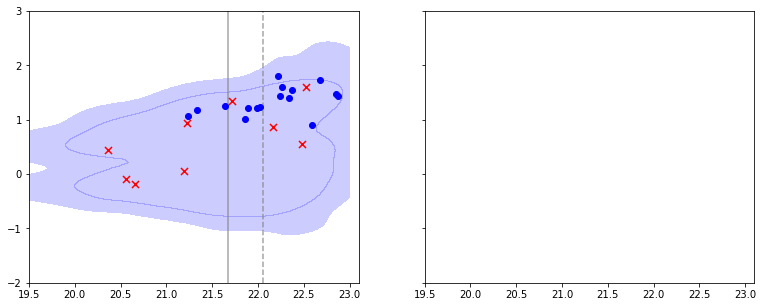

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))

knmag = []
kncol = []
for mag, col in zip(KN_appmag_g_gr, KN_grcolor):
    if mag < 23:
        knmag.append(mag)
        kncol.append(col)
KN_2darray = np.asarray([knmag, kncol])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)


#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
              colors=['b'],
              linewidths=(1,),
              origin=origin, alpha=0.2)

mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])
    
ax[0].scatter(kn_mg_rg_170817, kn_gr_170817, c='b', zorder=9, label="170817 like kn")
ax[0].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[0].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

plt.xlim(19.5,23.1)
plt.ylim(-2,3)

### New SNANA sims (run on 1-13-20)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


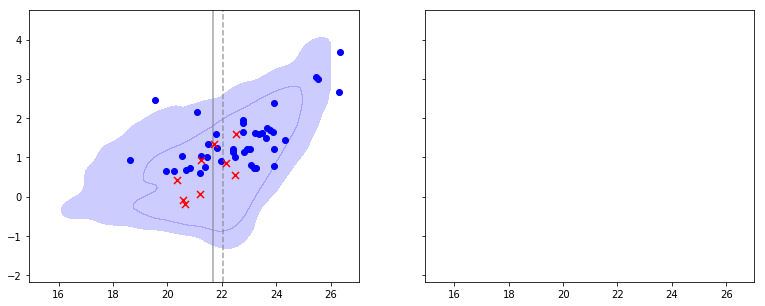

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))

knmag = []
kncol = []
for mag, col in zip(KN_appmag_g_gr, KN_grcolor):
    if mag < 26:
        knmag.append(mag)
        kncol.append(col)
KN_2darray = np.asarray([knmag, kncol])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)


#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
              colors=['b'],
              linewidths=(1,),
              origin=origin, alpha=0.2)

mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])
    
ax[0].scatter(kn_mg_rg_170817, kn_gr_170817, c='b', zorder=9, label="170817 like kn")
ax[0].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[0].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

#plt.xlim(19,24.1)
#plt.ylim(-2,3)

# Fixed dist kn sims

In [ ]:
KNfixed_appmag_r_rz = np.loadtxt("KN_appmag_r_rz_fixedDist.txt", unpack=True)
KNfixed_appmag_g_gz = np.loadtxt("KN_appmag_r_gz_fixedDist.txt", unpack=True)
KNfixed_appmag_g_gr = np.loadtxt("KN_appmag_r_gr_fixedDist.txt", unpack=True)
KNfixed_rzcolor = np.loadtxt("KN_rzcolor_fixedDist.txt", unpack=True)
KNfixed_gzcolor = np.loadtxt("KN_gzcolor_fixedDist.txt", unpack=True)
KNfixed_grcolor = np.loadtxt("KN_grcolor_fixedDist.txt", unpack=True)

print len(KNfixed_appmag_r_rz)
print len(KNfixed_appmag_g_gz)
print len(KNfixed_appmag_g_gr)
print len(KNfixed_rzcolor)
print len(KNfixed_gzcolor)
print len(KNfixed_grcolor)

In [16]:
KNfixed_path = '/home/s1/alyssag/alyssag/SNANA/RMsims/KN_fixedDist'
KNfixed_dat_files = glob.glob(KNfixed_path + '/*.DAT')

In [ ]:
vels_grf = []
Xlans_grf =[]
masses_grf = []

vels_gzf = []
Xlans_gzf =[]
masses_gzf = []

vels_rzf = []
Xlans_rzf =[]
masses_rzf = []

maxsimobsf = []
colorrzf = []
colorgrf = []
colorgzf = []
m_r_rzf = []
m_g_grf = []
m_g_gzf = []
simg_gzf = []
simgf = []
simrf = []

for dat_file in KNfixed_dat_files:
    try:
        lines = open_dat(dat_file)
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
    
#    photflags = np.array(lc['PHOTFLAG'].values, dtype=int)
#    photprobs = np.array(lc['PHOTPROB'].values, dtype=float)

#    cond = np.where(photprobs >= 0.7)[0] #return indicies of values that pass condition
#    test = list(cond)
#    goodlc = lc.loc[test, :] #keep only those
    
#    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR']) if flt == 'g']    
#    phoprob = [prob for flt, prob in zip(lc['FLT'].values, lc['PHOTPROB'].values) if flt == 'g' or flt == 'r']    
    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    

    if max(snr) > 5:
#    if min(phoprob) > 0.7:
        maxsimobsf.append(max(lc['SIM_MAGOBS\n'].values))

        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]
        if dupes.empty: 
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups

        #there is a bug, drop repeated date
        else: 
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups
            
            for key, values in gb.iteritems():
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)
            
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups
        
        if not final_list.empty:
            for key, val in gb.iteritems():
                #print "key, val", key, val
                filters = final_list.ix[val]['FLT'].values #list of bands for each night
                if len(filters) >= 2: #need r and g bands 
                    fluxes = final_list.ix[val]['FLUXCAL'].values #fluxes for each band
                    simmagobs = final_list.ix[val]['SIM_MAGOBS\n'].values 
                    #print filters, fluxes, simmagobs
                    rflux = []
                    gflux = []
                    zflux = [] 
                    simmagr = []
                    simmagg = []
                    simmagz = []
                    for flt, flux, mag in zip(filters, fluxes, simmagobs):    
                        if flt == 'r':
                            #print fluxes[n], flt
                            rflux.append(flux)
                            simmagr.append(mag)
                        elif flt == 'g':
                            #print fluxes[n], flt
                            gflux.append(flux)
                            simmagg.append(mag)
                        elif flt == 'z':
                            zflux.append(flux)
                            simmagz.append(mag)
                            
                    # g-r color and gmag
                    for i,j,g in zip(gflux, rflux, simmagg):
                        if i > 0 and j > 0:
                            #print lc
                            #print i,j
                            colorgrf.append(calc_color_from_flux(i, j))
                            m = compute_mag_from_flux(i)
                            #if m > 30:
                            #    print lc
                            m_g_grf.append(m)
                            simgf.append(g)
                            
                            vels_grf.append(knmd["VEL"])
                            Xlans_grf.append(knmd["LOGXLAN"])
                            masses_grf.append(knmd["LOGMASS"])
                    
                    # g-z color and gmag
                    for i,j,g in zip(gflux, zflux, simmagg):
                        if i > 0 and j > 0:
                            colorgzf.append(calc_color_from_flux(i, j))
                            m_g_gzf.append(compute_mag_from_flux(i))
                            simg_gzf.append(g)
                            
                            vels_gzf.append(knmd["VEL"])
                            Xlans_gzf.append(knmd["LOGXLAN"])
                            masses_gzf.append(knmd["LOGMASS"])
                    
                    # r-z color and rmag
                    for i,j,r in zip(rflux, zflux, simmagr):
                        if i > 0 and j > 0:
                            colorrzf.append(calc_color_from_flux(i, j))
                            m_r_rzf.append(compute_mag_from_flux(i))
                            simrf.append(r)
                            
                            vels_rzf.append(knmd["VEL"])
                            Xlans_rzf.append(knmd["LOGXLAN"])
                            masses_rzf.append(knmd["LOGMASS"])

In [ ]:
print len(maxsimobsf)
print max(maxsimobsf)
print min(maxsimobsf)
print
print len(m_r_rzf)
print min(m_r_rzf), max(m_r_rzf)
print min(simrf), max(simrf)
print 
print len(m_g_gzf)
print min(m_g_gzf), max(m_g_gzf)
print min(simg_gzf), max(simg_gzf)
print 
print len(m_g_grf)
print min(m_g_grf), max(m_g_grf)
print min(simgf), max(simgf)
print 
print len(vels_grf)
#print len(KNfixed_grcolor), len(Xlans_grf), len(masses_grf)
#colorrzf
print len(colorgrf)
#colorgzf = []

In [19]:
knf_mg_rg_170817 = []
knf_gr_170817 = []

knf_mg_gr_not170807 = []
knf_gr_not170807 = []

for n in range(len(colorgrf)):
    if vels_grf[n]==0.3 and Xlans_grf[n]==-4.0 and round(10**masses_grf[n],4)==0.025:
        knf_mg_rg_170817.append(m_g_grf[n])
        knf_gr_170817.append(colorgrf[n])
    else:
        knf_gr_not170807.append(colorgrf[n])
        knf_mg_gr_not170807.append(m_g_grf[n])
        
print len(knf_mg_rg_170817)
print len(knf_mg_gr_not170807)

52
7558


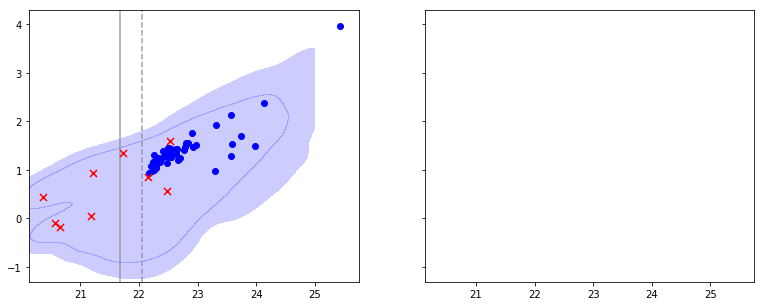

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))

knmag = []
kncol = []
for mag, col in zip(m_g_grf, colorgrf):
    if mag < 25:
        knmag.append(mag)
        kncol.append(col)
KN_2darray = np.asarray([knmag, kncol])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)


#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
              colors=['b'],
              linewidths=(1,),
              origin=origin, alpha=0.2)

mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])
    
ax[0].scatter(knf_mg_rg_170817, knf_gr_170817, c='b', zorder=9, label="170817 like kn")
ax[0].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[0].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

#plt.xlim(20,24)
#plt.ylim(-2,3)

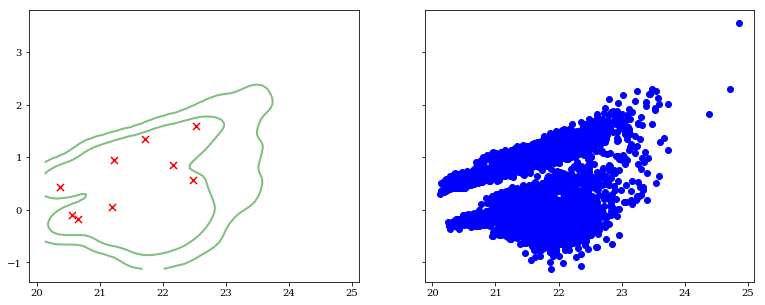

In [41]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))
# ax.scatter(Ia_appmag_g, Ia_colors, c='r', label="SNe Ia")
ax[1].scatter(KNfixed_appmag_g_gr, KNfixed_grcolor, c='b', label = "Kilonova")
# ax.scatter(CC_appmag_g, CC_colors, c='g', label = "SNe CC")

#make data into numpy arrays
KN_2darray = np.asarray([KNfixed_appmag_g_gr, KNfixed_grcolor])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)


#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

# KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
#               colors=['b'],
#               linewidths=(1,),
#               origin=origin, alpha=0.2)
KNCS = ax[0].contour(KNxi, KNyi, KNzi,levels = levels,
              colors=['g'],
              linewidths=(2,),
              origin=origin, alpha=0.5)

mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])
    
#ax[0].scatter(kn_mg_rg_170817, kn_gr_170817, c='b', zorder=9, label="170817 like kn")

# Combine original kn, fixed dist kn, and sn

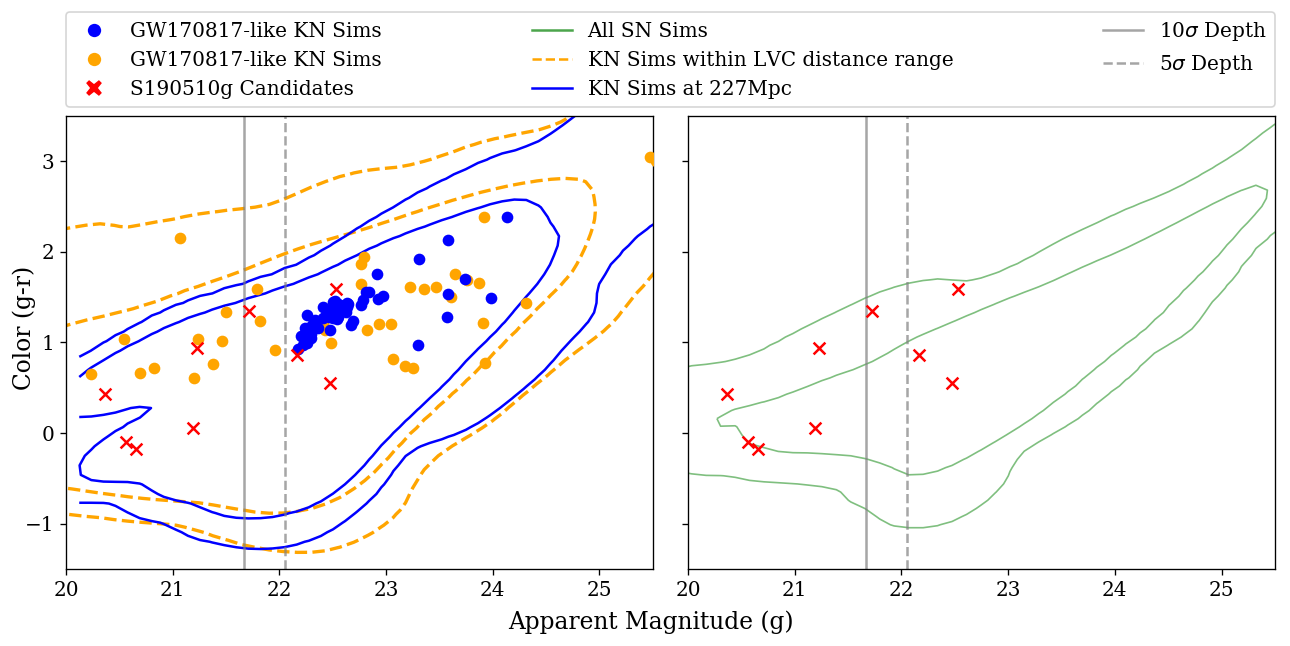

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5), dpi=120)
# ax.scatter(Ia_appmag_g, Ia_colors, c='r', label="SNe Ia")
# ax.scatter(KN_appmag_g, KN_colors, c='b', label = "Kilonova")
# ax.scatter(CC_appmag_g, CC_colors, c='g', label = "SNe CC")

#make data into numpy arrays
### kn sims with range 0.03 - 0.09
knmag = []
kncol = []
for mag, col in zip(KN_appmag_g_gr, KN_grcolor):
    if mag < 26:
        knmag.append(mag)
        kncol.append(col)
KN_2darray = np.asarray([knmag, kncol])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)


#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

KNCS = ax[0].contour(KNxi, KNyi, KNzi,levels = levels,
              colors=['orange'],
              linewidths=(2,),
              origin=origin, alpha=1.0, linestyles='dashed')

ax[0].scatter(kn_mg_rg_170817, kn_gr_170817, c='orange', zorder=9, label="170817 like kn")


### plot the real candidates and depths
mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])

ax[0].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[0].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

###### contour for fixed dist kn sims ##########

KNfixed_2darray = np.asarray([m_g_grf, colorgrf]) #KNfixed_appmag_g_gr, KNfixed_grcolor
KNxf,KNyf = KNfixed_2darray

#apply gaussian kde to calc density of points
KNkf = gaussian_kde(KNfixed_2darray)
KNxif, KNyif = np.mgrid[KNxf.min():KNxf.max():KNxf.size**0.5*1j,KNyf.min():KNyf.max():KNyf.size**0.5*1j]
KNzif = KNkf(np.vstack([KNxif.flatten(), KNyif.flatten()]))

#set zi to 0-1 scale
KNzif = 1 - (KNzif-KNzif.min())/(KNzif.max() - KNzif.min())
KNzif =KNzif.reshape(KNxif.shape)


#set up plot
originf = 'lower'
levelsf = [0., 0.90, 0.99]

# KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
#               colors=['b'],
#               linewidths=(1,),
#               origin=origin, alpha=0.2)
KNCSf = ax[0].contour(KNxif, KNyif, KNzif,levels = levelsf,
              colors=['b'],
              linewidths=(1.5,),
              origin=originf, alpha=1.0)

ax[0].scatter(knf_mg_rg_170817, knf_gr_170817, c='b', zorder=9, label="170817 like kn")
# #### contour for 170817 like sims with 170817 params ######

# data1 = np.asarray([knf_mg_rg_170817, knf_gr_170817])
# x1,y1 = data1
# k1 = kde.gaussian_kde(data1)
# nbins1 = 18
# xi1, yi1 = np.mgrid[x1.min():x1.max():nbins*1j, y1.min():y1.max():nbins*1j]
# zi1 = k1(np.vstack([xi1.flatten(), yi1.flatten()]))
# zi1 = 1 - (zi1-zi1.min())/(zi1.max() - zi1.min())
# zi1 =zi1.reshape(xi1.shape)

# #ax[0].contour(xi1, yi1, zi1.reshape(xi1.shape), levels=[0.9])
# ax[0].scatter(knf_mg_rg_170817, knf_gr_170817, c='gold', zorder=9, label="170817 like kn")


################### All SNe sims + real cands ##############
allSNgr_2darray = np.asarray([allSN_mag_g_gr, allSN_color])
allSNx, allSNy = allSNgr_2darray

allSNk = gaussian_kde(allSNgr_2darray)
allSNxi, allSNyi = np.mgrid[allSNx.min():allSNx.max():allSNx.size**0.5*1j,allSNy.min():allSNy.max():allSNy.size**0.5*1j]
allSNzi = allSNk(np.vstack([allSNxi.flatten(), allSNyi.flatten()]))

allSNzi = 1 - (allSNzi-allSNzi.min())/(allSNzi.max() - allSNzi.min())
allSNzi =allSNzi.reshape(allSNxi.shape)

origin = 'lower'
levels = [0., 0.90, 0.99]

SNCS = ax[1].contour(allSNxi, allSNyi, allSNzi,levels = levels,
              colors=['g'],
              linewidths=(1,),
              origin=origin, alpha=0.5)

for k in range(len(real_color)):
    ax[1].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])

ax[1].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[1].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

#######################################################################################

#plt.rc('font',family='Times New Roman')
plt.rc('font',family='Serif')
#plt.legend
plt.xlim(20,25.5)
plt.ylim(-1.5,3.5)
#plt.xlabel("Apparent Magnitude (g)", size=12)
#plt.ylabel("Color (g-r)", size=12)
#ax[0].set_xlabel("Apparent Magnitude (g)", size=12)
fig.text(0.5, 0.025, 'Apparent Magnitude (g)', ha='center', size=14)
#ax[0].set_ylabel("Color (g-r)", size=12)
fig.text(0.098, 0.6, 'Color (g-r)', ha='center', size=14, rotation=90)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='b', label='GW170817-like KN Sims', markersize=9),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', label='GW170817-like KN Sims', markersize=9),
                   Line2D([0], [0], marker='X', color='w', markerfacecolor='r', label='S190510g Candidates', markersize=11),
                   #Patch(facecolor='b', alpha=0.2, label='All KN Sims'),
                  #Patch(facecolor='g', alpha=0.2, label='All SN Sims'),
                   Line2D([0], [0], ls='-', color='g', alpha=0.7, markerfacecolor='b', label='All SN Sims', markersize=9),
                  Line2D([0], [0], ls='--', color='orange', alpha=1.0, markerfacecolor='b', label='KN Sims within LVC distance range', markersize=9), 
                   Line2D([0], [0], ls='-', color='b', alpha=1.0, markerfacecolor='b', label='KN Sims at 227Mpc', markersize=9),
                  Line2D([0], [0], color='gray', alpha=0.7, markerfacecolor='b', label='10$\sigma$ Depth', markersize=9),
                  Line2D([0], [0], ls='--', color='gray', alpha=0.7, markerfacecolor='b', label='5$\sigma$ Depth', markersize=9)]

#plt.legend(handles=legend_elements, loc=2)
#lgd = plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
ax[0].legend(handles=legend_elements, bbox_to_anchor=(0.0, 1.02, 2.06, .102), ncol=3, loc='lower left', mode="expand", borderaxespad=0., fontsize=12)


plt.subplots_adjust(wspace=0.06, hspace=0)

#plt.savefig("ColorMagg_twoplots_gw190510.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig("ColorMagg_twoplots_gw190510_snr5_200117.png", bbox_inches='tight')



# resave fixed dist but with snr cut of 5

In [ ]:
KN_pass_snr = 0
KN_has_rg = 0
KN_lc = []
#KN_colors = open("KN_colors_gz.txt", 'w')
KN_absmag_g = []
#KN_appmag_g = open("KN_appmag_g.txt", 'w')
maxsimobs = []

KN_appmag_r_rz = open("KN_appmag_r_rz_fixedDist_snr5_191218.txt", 'w')
KN_appmag_g_gz = open("KN_appmag_r_gz_fixedDist_snr5_191218.txt", 'w')
KN_appmag_g_gr = open("KN_appmag_r_gr_fixedDist_snr5_191218.txt", 'w')
KN_rzcolor = open("KN_rzcolor_fixedDist_snr5_191218.txt", 'w')
KN_gzcolor = open("KN_gzcolor_fixedDist_snr5_191218.txt", 'w')
KN_grcolor = open("KN_grcolor_fixedDist_snr5_191218.txt", 'w')

vels_gr = []
Xlans_gr =[]
masses_gr = []

vels_gz = []
Xlans_gz =[]
masses_gz = []

vels_rz = []
Xlans_rz =[]
masses_rz = []

df_gr, df_gz, df_rz = [], [], []

for dat_file in KNfixed_dat_files:

    try:
        lines = open_dat(dat_file)
        #good += 1.0
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    #skysig = md['SKYSIG']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
#    vels.append(knmd["VEL"])
#    Xlans.append(knmd["LOGXLAN"])
#    masses.append(knmd["LOGMASS"])
    
    #check for decent snr
    snr = lc['FLUXCAL'].values / lc['FLUXCALERR'].values
    
#     photflags = np.array(lc['PHOTFLAG'].values, dtype=int)
#     photprobs = np.array(lc['PHOTPROB'].values, dtype=float)

#     cond = np.where(photprobs >= 0.7)[0] #return indicies of values that pass condition
#     test = list(cond)
#     goodlc = lc.loc[test, :] #keep only those
    
    #print max(lc['SIM_MAGOBS\n'].values)
    phoprob = [prob for flt, prob in zip(lc['FLT'].values, lc['PHOTPROB'].values) if flt == 'g' or flt == 'r']    

#    if max(snr) > 5:
    if all(s > 5 for s in snr) == True:
    #if min(phoprob) > 0.7:  
        KN_pass_snr += 1
        KN_lc.append(md)
        
        #check if there are any repeated mjd's from the bug
        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]

        #if there are no issues with repeating mjds
        if dupes.empty: 
            #print "no problems"
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)
            #lc.drop(lc[(lc.FLT == 'r')].index, inplace=True) #get rid of z band
                
            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups

        #there is a bug, drop repeated date
        else: 
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups
            
            #drop the row with that contains the min flux for duplicated date
            for key, values in gb.iteritems():
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)
            
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
            #dupes.drop(dupes[(dupes.FLT == 'r')].index, inplace=True) #get rid of z band
                
            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups
        
        if not final_list.empty:
            #print("final list", final_list['FLT'].values, final_list['MJD'].values)
            #make sure there is an r and g band for each night
            for key, val in gb.iteritems():
                filters = final_list.ix[val]['FLT'].values #list of bands for each night
                #print filters, md['SNID']
                if len(filters) >= 2: #need r and g bands 
                    KN_has_rg += 1
                    fluxes = final_list.ix[val]['FLUXCAL'].values #fluxes for each band
                    #print fluxes, filters
                    rflux = []
                    gflux = []
                    zflux = [] 
                    for n,flt in enumerate(filters):    
                        if flt == 'r':
                            #print fluxes[n], flt
                            rflux.append(fluxes[n])
                        elif flt == 'g':
                            #print fluxes[n], flt
                            gflux.append(fluxes[n])
                        elif flt == 'z':
                            zflux.append(fluxes[n])
                            
                    # g-r color and gmag
                    for i,j in zip(gflux, rflux):
                        if i > 0 and j > 0:
                            KN_grcolor.write("%s\n" % calc_color_from_flux(i, j))
                            m_g = compute_mag_from_flux(i)
                            M_g = absmag(m_g, dist)
                            KN_appmag_g_gr.write("%s\n" % m_g)
                            
                            vels_gr.append(knmd["VEL"])
                            Xlans_gr.append(knmd["LOGXLAN"])
                            masses_gr.append(knmd["LOGMASS"])
                            
                            c = calc_color_from_flux(i, j)
                            df_gr.append([m_g, c, knmd['VEL'], knmd['LOGXLAN'], knmd['LOGMASS']])
                    
                    # g-z color and gmag
                    for i,j in zip(gflux, zflux):
                        if i > 0 and j > 0:
                            KN_gzcolor.write("%s\n" % calc_color_from_flux(i, j))
                            m_g = compute_mag_from_flux(i)
                            M_g = absmag(m_g, dist)
                            KN_appmag_g_gz.write("%s\n" % m_g)
                            
                            vels_gz.append(knmd["VEL"])
                            Xlans_gz.append(knmd["LOGXLAN"])
                            masses_gz.append(knmd["LOGMASS"])
                            
                            c = calc_color_from_flux(i, j)
                            df_gz.append([m_g, c, knmd['VEL'], knmd['LOGXLAN'], knmd['LOGMASS']])
                    
                    # r-z color and rmag
                    for i,j in zip(rflux, zflux):
                        if i > 0 and j > 0:
                            KN_rzcolor.write("%s\n" % calc_color_from_flux(i, j))
                            m_r = compute_mag_from_flux(i)
                            M_r = absmag(m_r, dist)
                            KN_appmag_r_rz.write("%s\n" % m_r)
                            
                            vels_rz.append(knmd["VEL"])
                            Xlans_rz.append(knmd["LOGXLAN"])
                            masses_rz.append(knmd["LOGMASS"])
                            
                            c = calc_color_from_flux(i, j)
                            df_rz.append([m_r, c, knmd['VEL'], knmd['LOGXLAN'], knmd['LOGMASS']])

cols = ['mag', 'col', 'vel', 'logxlan', 'logmass']
mydf_gr = pd.DataFrame(df_gr, columns=cols)
mydf_gz = pd.DataFrame(df_gz, columns=cols)
mydf_rz = pd.DataFrame(df_rz, columns=cols)

KN_appmag_r_rz.close()
KN_appmag_g_gz.close()
KN_appmag_g_gr.close()
KN_rzcolor.close()
KN_gzcolor.close()
KN_grcolor.close()

In [ ]:
KNfixed_appmag_r_rz = np.loadtxt("KN_appmag_r_rz_fixedDist_snr5_191218.txt", unpack=True)
KNfixed_appmag_g_gz = np.loadtxt("KN_appmag_r_gz_fixedDist_snr5_191218.txt", unpack=True)
KNfixed_appmag_g_gr = np.loadtxt("KN_appmag_r_gr_fixedDist_snr5_191218.txt", unpack=True)
KNfixed_rzcolor = np.loadtxt("KN_rzcolor_fixedDist_snr5_191218.txt", unpack=True)
KNfixed_gzcolor = np.loadtxt("KN_gzcolor_fixedDist_snr5_191218.txt", unpack=True)
KNfixed_grcolor = np.loadtxt("KN_grcolor_fixedDist_snr5_191218.txt", unpack=True)

print len(KNfixed_appmag_r_rz)
print len(KNfixed_appmag_g_gz)
print len(KNfixed_appmag_g_gr)
print len(KNfixed_rzcolor)
print len(KNfixed_gzcolor)
print len(KNfixed_grcolor)
print len(vels_gr)

# Testing new methods to make loading / sorting faster
it did not work

In [94]:
import time

In [95]:
print time.ctime()

Mon Mar 23 23:56:34 2020


In [ ]:
#testkndatfiles = KN_dat_files[:100]
print time.ctime()
master = {}
knmd_all = {}
count = 0.
for dat_file in KN_dat_files:
    try:
        lines = open_dat(dat_file)
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
    
    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    

    if max(snr) > 5:
        count +=1.
        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]
        if dupes.empty: 
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            #grouped_df = final_list.groupby(['MJD']) #group by date
            #gb = grouped_df.groups

        #there is a bug, drop repeated date
        else: 
            print "repeats"
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups
            
            for key, values in gb.iteritems():
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)
            
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            #grouped_df = final_list.groupby(['MJD']) #group by date
            #gb = grouped_df.groups
        
        if not final_list.empty:
            lc = final_list
            try:
                g= lc.index[lc['FLT']=='g'].values[0]
                g_mag = compute_mag_from_flux(lc['FLUXCAL'][g])
                sim_magobs_g = lc['SIM_MAGOBS\n'][g]
            except:
                g = -999
                g_mag = -999
                sim_magobs_g = -999
            try:
                r= lc.index[lc['FLT']=='r'].values[0]
                r_mag = compute_mag_from_flux(lc['FLUXCAL'][r])
                sim_magobs_r = lc['SIM_MAGOBS\n'][r]
            except:
                r = -999
                r_mag = -999
                sim_magobs_r = -999
            try:
                z= lc.index[lc['FLT']=='z'].values[0]
                z_mag = compute_mag_from_flux(lc['FLUXCAL'][z])
                sim_magobs_z = lc['SIM_MAGOBS\n'][z]
            except:
                z = -999
                z_mag = -999
                sim_magobs_z = -999

            if g != -999 and r != -999:
                grcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][r])
            else:
                grcolor = -999
            if g != -999 and z != -999:
                gzcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][z])
            else:
                gzcolor = -999
            if r != -999 and z != -999:
                rzcolor = calc_color_from_flux(lc['FLUXCAL'][r], lc['FLUXCAL'][z])
            else:
                rzcolor = -999



            snid = md['SNID']
            knmd_all[snid] = {'RA': md['RA'], 'DEC': md['DEC'], 'HOSTZ':md['HOSTZ'], 
                             'LOGMASS': knmd['LOGMASS'], 'VEL': knmd['VEL'], 'LOGXLAN': knmd['LOGXLAN']}

            #lc: grcolor, gzcolor, rzcolor, gmag, rmag, zmag, simg, simr, simz
            master[snid] = {'grcolor': grcolor,'gzcolor': gzcolor,'rzcolor': grcolor, 
                           'gmag':g_mag,'rmag':g_mag,'zmag':g_mag,
                           'sim_mag_g': sim_magobs_g,'sim_mag_r': sim_magobs_r,'sim_mag_z': sim_magobs_z}
            
        else:
            print "empty"
            #print lc
np.save('testkn_dict.npy',master)
np.save('testknmd_dict.npy',knmd_all)
print 
print time.ctime()

In [4]:
testkn = np.load('testkn_dict.npy').item()
testkn_md = np.load('testknmd_dict.npy').item()

In [5]:
testkn_md

{'3480': {'DEC': -35.873662,
  'HOSTZ': 0.049247,
  'LOGMASS': -2.0,
  'LOGXLAN': -4.0,
  'RA': 86.634276,
  'VEL': 0.3},
 '5989': {'DEC': -30.343801,
  'HOSTZ': 0.06685,
  'LOGMASS': -1.3979,
  'LOGXLAN': -3.0,
  'RA': 86.389158,
  'VEL': 0.1},
 '5982': {'DEC': -35.769921,
  'HOSTZ': 0.07087,
  'LOGMASS': -1.1249,
  'LOGXLAN': -5.0,
  'RA': 92.861077,
  'VEL': 0.1},
 '5980': {'DEC': -35.528171,
  'HOSTZ': 0.09357,
  'LOGMASS': -1.3979,
  'LOGXLAN': -4.0,
  'RA': 91.270077,
  'VEL': 0.1},
 '5981': {'DEC': -37.046153,
  'HOSTZ': 0.009499,
  'LOGMASS': -2.0,
  'LOGXLAN': -5.0,
  'RA': 88.085346,
  'VEL': 0.3},
 '5986': {'DEC': -30.754258,
  'HOSTZ': 0.037313,
  'LOGMASS': -1.6021,
  'LOGXLAN': -2.0,
  'RA': 91.126553,
  'VEL': 0.3},
 '5987': {'DEC': -34.962337,
  'HOSTZ': 0.013706,
  'LOGMASS': -3.0,
  'LOGXLAN': -3.0,
  'RA': 92.652658,
  'VEL': 0.03},
 '5984': {'DEC': -35.700486,
  'HOSTZ': 0.011611,
  'LOGMASS': -2.0,
  'LOGXLAN': -5.0,
  'RA': 92.194893,
  'VEL': 0.05},
 '6487': {'DE

In [76]:
testkndatfiles = KN_dat_files[:5]
master = {}
knmd_all = {}
for dat_file in testkndatfiles:
    try:
        lines = open_dat(dat_file)
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
    
    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    

    if max(snr) > 5:
        try:
            g= lc.index[lc['FLT']=='g'].values[0]
            g_mag = compute_mag_from_flux(lc['FLUXCAL'][g])
            sim_magobs_g = lc['SIM_MAGOBS\n'][g]
        except:
            g = -999
            g_mag = -999
            sim_magobs_g = -999
        try:
            r= lc.index[lc['FLT']=='r'].values[0]
            r_mag = compute_mag_from_flux(lc['FLUXCAL'][r])
            sim_magobs_r = lc['SIM_MAGOBS\n'][r]
        except:
            r = -999
            r_mag = -999
            sim_magobs_r = -999
        try:
            z= lc.index[lc['FLT']=='z'].values[0]
            z_mag = compute_mag_from_flux(lc['FLUXCAL'][z])
            sim_magobs_z = lc['SIM_MAGOBS\n'][z]
        except:
            z = -999
            z_mag = -999
            sim_magobs_z = -999

        if g != -999 and r != -999:
            grcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][r])
        else:
            grcolor = -999
        if g != -999 and z != -999:
            gzcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][z])
        else:
            gzcolor = -999
        if r != -999 and z != -999:
            rzcolor = calc_color_from_flux(lc['FLUXCAL'][r], lc['FLUXCAL'][z])
        else:
            rzcolor = -999



        snid = md['SNID']
        knmd_all[snid] = {'RA': md['RA'], 'DEC': md['DEC'], 'HOSTZ':md['HOSTZ'], 
                         'LOGMASS': knmd['LOGMASS'], 'VEL': knmd['VEL'], 'LOGXLAN': knmd['LOGXLAN']}

        #lc: grcolor, gzcolor, rzcolor, gmag, rmag, zmag, simg, simr, simz
        master[snid] = {'grcolor': grcolor,'gzcolor': gzcolor,'rzcolor': grcolor, 
                       'gmag':g_mag,'rmag':g_mag,'zmag':g_mag,
                       'sim_mag_g': sim_magobs_g,'sim_mag_r': sim_magobs_r,'sim_mag_z': sim_magobs_z}


In [78]:
knmd_all

{'1': {'DEC': -32.987214,
  'HOSTZ': 0.079279,
  'LOGMASS': -1.1249,
  'LOGXLAN': -9.0,
  'RA': 89.575161,
  'VEL': 0.1},
 '2': {'DEC': -37.078662,
  'HOSTZ': 0.070442,
  'LOGMASS': -1.5229,
  'LOGXLAN': -4.0,
  'RA': 91.189913,
  'VEL': 0.1},
 '4': {'DEC': -27.822414,
  'HOSTZ': 0.040011,
  'LOGMASS': -1.0,
  'LOGXLAN': -4.0,
  'RA': 89.566822,
  'VEL': 0.3},
 '5': {'DEC': -37.901743,
  'HOSTZ': 0.040944,
  'LOGMASS': -1.301,
  'LOGXLAN': -5.0,
  'RA': 89.053871,
  'VEL': 0.05}}

In [27]:
try:
    g= lc.index[lc['FLT']=='g']
    g_mag = compute_mag_from_flux(lc['FLUXCAL'][g][0])
    sim_magobs_g = lc['SIM_MAGOBS\n'][g][0]
except:
    g = -999
    g_mag = -999
    sim_magobs_g = -999
try:
    r= lc.index[lc['FLT']=='r']
    r_mag = compute_mag_from_flux(lc['FLUXCAL'][r][0])
    sim_magobs_r = lc['SIM_MAGOBS\n'][r][0]
except:
    r = -999
    r_mag = -999
    sim_magobs_r = -999
try:
    z= lc.index[lc['FLT']=='z']
    z_mag = compute_mag_from_flux(lc['FLUXCAL'][z][0])
    sim_magobs_z = lc['SIM_MAGOBS\n'][z][0]
except:
    z = -999
    z_mag = -999
    sim_magobs_z = -999

if g != -999 & r != -999:
    grcolor = calc_color_from_flux(lc['FLUXCAL'][g][0], lc['FLUXCAL'][r][0])
if g != -999 & z !=-999:
    gzcolor = calc_color_from_flux(lc['FLUXCAL'][g][0], lc['FLUXCAL'][z][0])
if r != -999 & z != -999:
    rzcolor = calc_color_from_flux(lc['FLUXCAL'][r][0], lc['FLUXCAL'][z][0])



snid = md['SNID']
knmd_all[snid] = {'RA': md['RA'], 'DEC': md['DEC'], 'HOSTZ':md['HOSTZ'], 
                 'LOGMASS': knmd['LOGMASS'], 'VEL': knmd['VEL'], 'LOGXLAN': knmd['LOGXLAN']}

#lc: grcolor, gzcolor, rzcolor, gmag, rmag, zmag, simg, simr, simz
master[snid] = {'grcolor': grcolor,'gzcolor': gzcolor,'rzcolor': grcolor, 
               'gmag':g_mag,'rmag':g_mag,'zmag':g_mag,
               'sim_mag_g': sim_magobs_g,'sim_mag_r': sim_magobs_r,'sim_mag_z': sim_magobs_z}


## recent tests with fits files from 3-19-20

In [ ]:
CC_head_file = '/data/des41.b/data/SNDATA_ROOT/SIM/agarcia_DESGW_GW190510_CC/agarcia_DESGW_GW190510_CC_HEAD.FITS'
CC_phot_file = '/data/des41.b/data/SNDATA_ROOT/SIM/agarcia_DESGW_GW190510_CC/agarcia_DESGW_GW190510_CC_PHOT.FITS'

Ia_head_file = '/data/des41.b/data/SNDATA_ROOT/SIM/agarcia_DESGW_GW190510_Ia/agarcia_DESGW_GW190510_Ia_HEAD.FITS'
Ia_phot_file = '/data/des41.b/data/SNDATA_ROOT/SIM/agarcia_DESGW_GW190510_Ia/agarcia_DESGW_GW190510_Ia_PHOT.FITS'

head_columns, head_data, head_df = load_fits_head(CC_head_file)
phot_columns, phot_data = load_fits_phot(CC_phot_file)

Iahead_columns, Iahead_data, Iahead_df = load_fits_head(Ia_head_file)
Iaphot_columns, Iaphot_data = load_fits_phot(Ia_phot_file)

In [ ]:
#phot_data[0]
#head_df.loc[0]
datadict = {}
for i in range(3):
    datadict[i] = {'lc':lcs, 'md':md}

i = 2
if i in datadict:
    print "bla"

this was by far the longest method of sorting

In [ ]:
## outerdict = {innerdict1:{light curve info}
#               innerdict2:{md info}}

datadict = {}
lcs = []
count = []
i=1
#testphot_data=phot_data[:10]
for data_line in phot_data:
    if data_line[1] != '-':
        if i in count:
            lcs.append(data_line)
            datadict[i] = {'lc':lcs, 'md':md}
        else:
            lcs.append(data_line)
            md = head_df.loc[i].to_dict()     
            count.append(i)
    else:
        i+=1.
        lcs = []
        
        
np.save('test_datadict.npy',datadict)
np.save('test_md.npy',md)

In [ ]:
for key, val in datadict.iteritems():
    print key
    print val['lc']
    print

In [ ]:
#md = {zip(name, val for name, val in head_df.loc[2].iterrows())}
testhead = head_df[:10]
#print testhead
mdkeys = [name for name, val in head_df.loc[0]]
mdvals = [val for name, val in testhead.iterrows()]
md = dict(zip(mdkeys, mdvals))
print md[0]['RA']

In [ ]:
df = pd.DataFrame(data=np.array(phot_data), columns=phot_columns)

this is the method I originally stole from rob, takes forever and I have no idea why it works

In [ ]:
lcs=[]
lc_data = []
for data_line in phot_data:
    if data_line[1] == '-':
        try:
            df = pd.DataFrame(data=np.array(lc_data), columns=phot_columns)
            #force photflag definition to include the 8192 bit for ml socre > 0.7                                 
            df['PHOTFLAG'] = [12288 if int(x) == 4096 and float(y) >= 0.7 else x for x, y in zip(df['PHOTFLAG'].values, df['PHOTPROB'].values)]
            lcs.append(df)
            lc_data = []
        except:
            lcs.append('SKIP')
            lc_data = []
    else:
        lc_data.append(data_line)

#construct out dictionary                                                                                         
out_dict = {}
for index, row in head_df.iterrows():
    if type(lcs[index]) != type('SKIP'):
        out_dict[row['SNID'].strip()] = {'metadata': row, 'lightcurve': lcs[index]}
        
np.save('testrm_outdict.npy',out_dict)

In [ ]:
data_dict = np.load('190510_ag_CCdata.npy').item()

In [ ]:
#%%heat #### profiler heat mat
CC_pass_snr = 0
CC_has_rg = 0
CC_lc = []
CC_absmag_g = []

name = '_3-19-20.txt'
CC_appmag_r_rz = open("CC_mag_r_rzphot_"+str(name), 'w')
CC_appmag_g_gz = open("CC_mag_r_gzphot_"+str(name), 'w')
CC_appmag_g_gr = open("CC_mag_r_grphot_"+str(name), 'w')
CC_rzcolor = open("CC_rzcolorphot_"+str(name), 'w')
CC_gzcolor = open("CC_gzcolorphot_"+str(name), 'w')
CC_grcolor = open("CC_grcolorphot_"+str(name), 'w')

cols = ['snid', 'g_mag','r_mag','z_mag', 'redshift', 'color']
fulllist = []

for snid, info in data_dict.iteritems():
#    if snid=="5988":
    lc = info['lightcurve']
    md = info['metadata']

    #z = md['HOSTZ']
    z = md['SIM_REDSHIFT_HOST']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)

#     snr = [float(i)/float(j) for i,j in zip(lc['FLUXCAL'].values,lc['FLUXCALERR'].values)]
#     #print snr

#     photflags = np.array(lc['PHOTFLAG'].values, dtype=int)
#     photprobs = np.array(lc['PHOTPROB'].values, dtype=float)
#     #print photflags
#     #print photprobs

#     cond = np.where(photprobs >= 0.7)[0] #return indicies of values that pass condition
#     test = list(cond)
#     goodlc = lc.loc[test, :] #keep only those
#     #print goodlc

    #photprob = [float(prob) for flt, prob in zip(lc['FLT'].values, lc['PHOTPROB'].values) if flt == 'g' or flt == 'r']
    snr = [float(flx) / float(flxerr) for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    
#    phoprob = [prob for flt, prob in zip(lc['FLT'].values, lc['PHOTPROB'].values) if flt == 'g' or flt == 'r']    

#    if max(snr) > 5:
    #if not photprob:
#        photprob = [0]
    
    if max(snr) > 5:
    #if min(photprob) >= 0.7:
        CC_pass_snr += 1
        CC_lc.append(md)
            
        #check if there are any repeated mjd's from the bug
        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]

        if dupes.empty: #if there are no issues with repeating mjds
            lc.MJD = lc.MJD.astype(float)
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)

            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups

        else: #there is a bug, drop repeated date
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups

            #drop the row with that contains the min flux for duplicated date
            dupes['FLUXCAL'] = pd.to_numeric(dupes['FLUXCAL'], errors='coerce')
            for key, values in gb.iteritems():
                #print dupes.iloc[values]['FLUXCAL'].values, type(dupes.iloc[values]['FLUXCAL'].values)
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)

            dupes.MJD = dupes.MJD.astype(float)
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
            #dupes.drop(dupes[(dupes.FLT == 'z')].index, inplace=True) #get rid of z band

            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            grouped_df = final_list.groupby(['MJD']) #group by date
            gb = grouped_df.groups

        if not final_list.empty:
            #print("final list", final_list['FLT'].values, final_list['MJD'].values)
            #make sure there is an r and g band for each night
            for key, val in gb.iteritems():
                filters = final_list.ix[val]['FLT'].values #list of bands for each night
                #print filters, md['SNID']
                if len(filters) >= 2: #need r and g bands 
                    #CC_has_rg += 1
                    fluxes = final_list.ix[val]['FLUXCAL'].values #fluxes for each band
                    #print fluxes, filters
                    rflux = []
                    gflux = []
                    zflux = []

                    #for n,flt in enumerate(filters):
                    for flt, flux in zip(filters, fluxes):
                        if flt == 'r':
                            #print fluxes[n], flt
                            rflux.append(flux)
                        elif flt == 'g':
                            #print fluxes[n], flt
                            gflux.append(flux)
                        elif flt == 'z':
                            zflux.append(flux)

                    # g-r color and gmag
                    for i,j in zip(gflux, rflux):
                        if float(i) > 0 and float(j) > 0:
                            color = calc_color_from_flux(i, j)
                            CC_grcolor.write("%s\n" % color)
                            
                            m_g = compute_mag_from_flux(float(i))
                            m_r = compute_mag_from_flux(float(j))
                            #M_g = absmag(m_g, dist)
                            CC_appmag_g_gr.write("%s\n" % m_g)
                            
                            fulllist.append([snid, m_g, m_r, -999, z, color])

                    # g-z color and gmag
                    for i,j in zip(gflux, zflux):
                        if float(i) > 0 and float(j) > 0:
                            color = calc_color_from_flux(i, j)
                            CC_gzcolor.write("%s\n" % color)
                            
                            m_g = compute_mag_from_flux(float(i))
                            m_z = compute_mag_from_flux(float(j))
                            #M_g = absmag(m_g, dist)
                            CC_appmag_g_gz.write("%s\n" % m_g)
                            
                            fulllist.append([snid, m_g, -999, m_z, z, color])

                    # r-z color and rmag
                    for i,j in zip(rflux, zflux):
                        if float(i) > 0 and float(j) > 0:
                            color = calc_color_from_flux(i, j)
                            CC_rzcolor.write("%s\n" % color)
                            
                            m_r = compute_mag_from_flux(float(i))
                            m_z = compute_mag_from_flux(float(j))
                            #M_r = absmag(m_r, dist)
                            CC_appmag_r_rz.write("%s\n" % m_r)
                            
                            fulllist.append([snid, -999, m_r, m_z, z, color])
df = pd.DataFrame(fulllist,columns=cols)
df.set_index('snid', inplace=True)
df.to_csv('full_CC_snr5cut_3-19-20.csv', mode='w', header=False)

CC_appmag_r_rz.close()
CC_appmag_g_gz.close()
CC_appmag_g_gr.close()
CC_rzcolor.close()
CC_gzcolor.close()
CC_grcolor.close()

In [ ]:
cols = ['snid', 'g_mag','r_mag','z_mag', 'redshift', 'color']
cc_df = pd.read_csv("full_CC_snr5cut.csv", names=cols, header=None)

In [ ]:
df = cc_df[cc_df.g_mag != -999]
df.plot(x='g_mag', y='color', style='o')

In [ ]:
test_dict = np.load('testrm_outdict.npy').item()

# sort data from dat files

In [ ]:
KNfixed_path = '/home/s1/alyssag/alyssag/SNANA/RMsims/KN_fixedDist'
KNfixed_dat_files = glob.glob(KNfixed_path + '/*.DAT')

KN_path = '/home/s1/alyssag/alyssag/SNANA/RMsims/kn_sims_1-13-20_withphot_190510distdistribution/'
KN_dat_files = glob.glob(KN_path + '/*.DAT')

In [ ]:
#testkndatfiles = KN_dat_files[:100]
print time.ctime()
master = {}
knmd_all = {}
count = 0.
for dat_file in KN_dat_files:
    try:
        lines = open_dat(dat_file)
    except:
        print(dat_file, "NOTFOUND")
        continue

    lc = get_lc_output(lines) #data for light curve
    md = get_meta_data(lines) #meta data (ra, dec, snid)
    z = md['HOSTZ']
    dist = convert_z_to_d(z, H0=70, Tcmb0=2.725, Om0=0.3)
    
    knmd = get_KN_data(lines)
    
    snr = [flx / flxerr for flt, flx, flxerr in zip(lc['FLT'].values, lc['FLUXCAL'].values, lc['FLUXCALERR'])]    

    if max(snr) > 5:
        count +=1.
        dupes = lc[lc.duplicated(subset=['MJD','FLT'], keep=False)]
        if dupes.empty: 
            lc.MJD = lc.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = lc[lc.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            #grouped_df = final_list.groupby(['MJD']) #group by date
            #gb = grouped_df.groups

        #there is a bug, drop repeated date
        else: 
            print "repeats"
            grouped_df = dupes.groupby(['MJD'])
            gb = grouped_df.groups
            
            for key, values in gb.iteritems():
                minflux = min(dupes.ix[values]['FLUXCAL'].values.astype(int))
                dupes.drop(dupes[(dupes.MJD == key) & (dupes.FLUXCAL.astype(int) == minflux)].index, inplace=True)
            
            dupes.MJD = dupes.MJD.round(1) #only care about day (not hr,min,sec)
                
            final_list = dupes[dupes.duplicated(subset=['MJD'], keep=False)] #keep rows where date is duplicated
            #grouped_df = final_list.groupby(['MJD']) #group by date
            #gb = grouped_df.groups
        
        if not final_list.empty:
            lc = final_list
            try:
                g= lc.index[lc['FLT']=='g'].values[0]
                g_mag = compute_mag_from_flux(lc['FLUXCAL'][g])
                sim_magobs_g = lc['SIM_MAGOBS\n'][g]
            except:
                g = -999
                g_mag = -999
                sim_magobs_g = -999
            try:
                r= lc.index[lc['FLT']=='r'].values[0]
                r_mag = compute_mag_from_flux(lc['FLUXCAL'][r])
                sim_magobs_r = lc['SIM_MAGOBS\n'][r]
            except:
                r = -999
                r_mag = -999
                sim_magobs_r = -999
            try:
                z= lc.index[lc['FLT']=='z'].values[0]
                z_mag = compute_mag_from_flux(lc['FLUXCAL'][z])
                sim_magobs_z = lc['SIM_MAGOBS\n'][z]
            except:
                z = -999
                z_mag = -999
                sim_magobs_z = -999

            if g != -999 and r != -999:
                grcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][r])
            else:
                grcolor = -999
            if g != -999 and z != -999:
                gzcolor = calc_color_from_flux(lc['FLUXCAL'][g], lc['FLUXCAL'][z])
            else:
                gzcolor = -999
            if r != -999 and z != -999:
                rzcolor = calc_color_from_flux(lc['FLUXCAL'][r], lc['FLUXCAL'][z])
            else:
                rzcolor = -999



            snid = md['SNID']
            knmd_all[snid] = {'RA': md['RA'], 'DEC': md['DEC'], 'HOSTZ':md['HOSTZ'], 
                             'LOGMASS': knmd['LOGMASS'], 'VEL': knmd['VEL'], 'LOGXLAN': knmd['LOGXLAN']}

            #lc: grcolor, gzcolor, rzcolor, gmag, rmag, zmag, simg, simr, simz
            master[snid] = {'grcolor': grcolor,'gzcolor': gzcolor,'rzcolor': grcolor, 
                           'gmag':g_mag,'rmag':g_mag,'zmag':g_mag,
                           'sim_mag_g': sim_magobs_g,'sim_mag_r': sim_magobs_r,'sim_mag_z': sim_magobs_z}
            
        else:
            print "empty"
            #print lc
#np.save('testkn_dict.npy',master)
#np.save('testknmd_dict.npy',knmd_all)
print 
print time.ctime()

In [ ]:
testkn = np.load('testkn_dict.npy').item()
testkn_md = np.load('testknmd_dict.npy').item()

In [ ]:
kn_mg_rg_170817 = []
kn_gr_170817 = []

kn_mg_gr_not170807 = []
kn_gr_not170807 = []

for snid, info in testkn.iteritems():
    if info['grcolor'] != -999:
        if testkn_md[str(snid)]['VEL']==0.3 and testkn_md[str(snid)]['LOGXLAN']==-4.0 and round(10**testkn_md[str(snid)]['LOGMASS'],4)==0.025:
            kn_mg_rg_170817.append(info['gmag'])
            kn_gr_170817.append(info['grcolor'])
        else:
            kn_gr_not170807.append(info['grcolor'])
            kn_mg_gr_not170807.append(info['gmag'])
print len(kn_mg_rg_170817)
print len(kn_mg_gr_not170807)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(13, 5))

knmag = []
kncol = []
for snid, info in testkn.iteritems():
    if info['grcolor'] != -999 and info['gmag'] <23:
        knmag.append(info['gmag'])
        kncol.append(info['grcolor'])
#print len(knmag)
#print len(kncol)

#put data into useful format
KN_2darray = np.asarray([knmag, kncol])
KNx,KNy = KN_2darray

#apply gaussian kde to calc density of points
KNk = gaussian_kde(KN_2darray)
KNxi, KNyi = np.mgrid[KNx.min():KNx.max():KNx.size**0.5*1j,KNy.min():KNy.max():KNy.size**0.5*1j]
KNzi = KNk(np.vstack([KNxi.flatten(), KNyi.flatten()]))

#set zi to 0-1 scale
KNzi = 1 - (KNzi-KNzi.min())/(KNzi.max() - KNzi.min())
KNzi =KNzi.reshape(KNxi.shape)

#set up plot
origin = 'lower'
levels = [0., 0.90, 0.99]

KNCS = ax[0].contourf(KNxi, KNyi, KNzi,levels = levels,
              colors=['b'],
              linewidths=(1,),
              origin=origin, alpha=0.2)

mycolors = ['red', 'blue', 'green', 'darkviolet','black', 
              'magenta', 'pink', 'orange', 'gold', 'cyan']
for k in range(len(real_color)):
    ax[0].scatter(float(real_apparent_mag[k]), float(real_color[k]), 
               c='r', marker='x', zorder=10, s=50) #c=mycolors[k], label=name[k])
    
ax[0].scatter(kn_mg_rg_170817, kn_gr_170817, c='b', zorder=9, label="170817 like kn")
ax[0].axvline(x=22.05, color='gray', alpha=0.7, linestyle='--')
ax[0].axvline(x=21.67, color='gray', alpha=0.7, linestyle='-')

plt.xlim(19.5,23.1)
plt.ylim(-2,3)